In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
import numpy as np

In [65]:
json_file_path = '/content/gdrive/My Drive/Colab Notebooks/_Project/_FirstData/Appliances.json'  # Update the path to your JSON file
#df = pd.read_json(json_file_path)
#data = []
# Read the entire JSON file as a text file
with open(json_file_path, 'r') as file:
  json_data = file.read()

# Create a DataFrame from the JSON data
df = pd.read_json(json_data, lines = True)

# Convert the DataFrame to CSV
# df.to_csv('/content/gdrive/My Drive/Colab Notebooks/_Project/_FirstData/Appliances.csv', index = False)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602777 entries, 0 to 602776
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   overall         602777 non-null  int64 
 1   vote            65262 non-null   object
 2   verified        602777 non-null  bool  
 3   reviewTime      602777 non-null  object
 4   reviewerID      602777 non-null  object
 5   asin            602777 non-null  object
 6   style           137973 non-null  object
 7   reviewerName    602762 non-null  object
 8   reviewText      602453 non-null  object
 9   summary         602649 non-null  object
 10  unixReviewTime  602777 non-null  int64 
 11  image           9258 non-null    object
dtypes: bool(1), int64(2), object(9)
memory usage: 51.2+ MB


In [42]:
df.head()

,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,image
0,5,2,False,"11 27, 2013",A3NHUQ33CFH3VM,1118461304,{'Format:': ' Hardcover'},Greeny,Not one thing in this book seemed an obvious o...,Clear on what leads to innovation,1385510400,NaN
1,5,NaN,False,"11 1, 2013",A3SK6VNBQDNBJE,1118461304,{'Format:': ' Kindle Edition'},Leif C. Ulstrup,I have enjoyed Dr. Alan Gregerman's weekly blo...,Becoming more innovative by opening yourself t...,1383264000,NaN
2,5,NaN,False,"10 10, 2013",A3SOFHUR27FO3K,1118461304,{'Format:': ' Hardcover'},Harry Gilbert Miller III,Alan Gregerman believes that innovation comes ...,The World from Different Perspectives,1381363200,NaN
3,5,NaN,False,"10 9, 2013",A1HOG1PYCAE157,1118461304,{'Format:': ' Hardcover'},Rebecca Ripley,"Alan Gregerman is a smart, funny, entertaining...",Strangers are Your New Best Friends,1381276800,NaN
4,5,10,False,"09 7, 2013",A26JGAM6GZMM4V,1118461304,{'Format:': ' Hardcover'},Robert Morris,"As I began to read this book, I was again remi...","How and why it is imperative to engage, learn ...",1378512000,NaN


In [67]:
# Assuming 'overall' is the target column, and you want to set up features
target = df['overall']  # Target variable
features = df.drop(columns=['overall'])  # Features (excluding the 'overall' column)


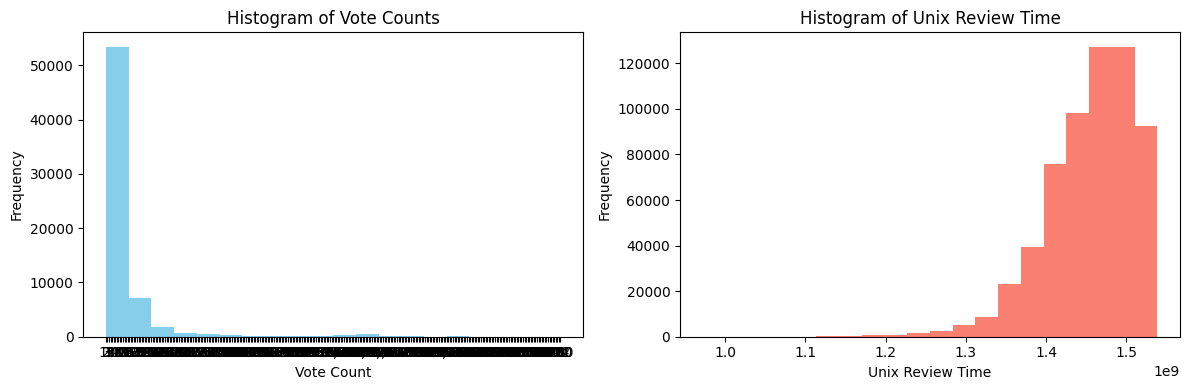

In [31]:
import matplotlib.pyplot as plt

# Example: Create histograms for 'vote' and 'unixReviewTime' columns
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(features['vote'].dropna(), bins=20, color='skyblue')
plt.title('Histogram of Vote Counts')
plt.xlabel('Vote Count')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(features['unixReviewTime'], bins=20, color='salmon')
plt.title('Histogram of Unix Review Time')
plt.xlabel('Unix Review Time')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


ValueError: ignored

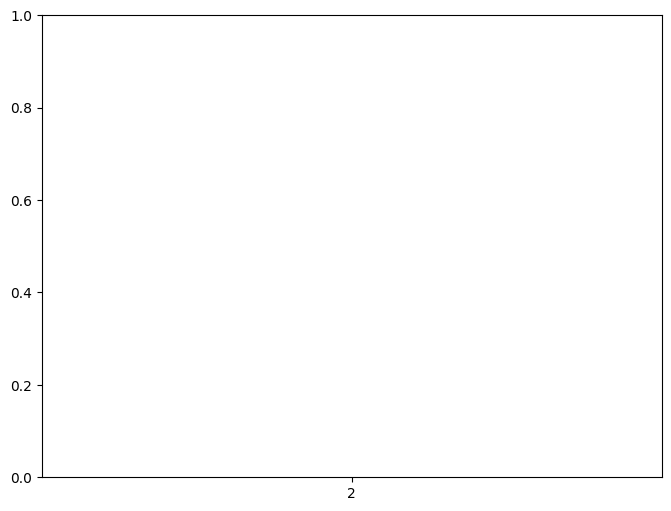

In [32]:
# Example: Create a scatter plot between 'overall' and 'vote' columns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(features['vote'].dropna(), target, alpha=0.2, color='green')
plt.title('Scatter Plot of Vote Count vs. Overall Rating')
plt.xlabel('Vote Count')
plt.ylabel('Overall Rating')
plt.show()


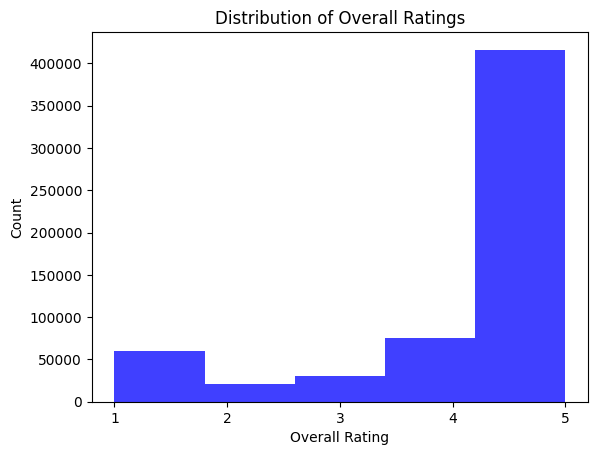

In [33]:
# Plot a histogram of the target variable
plt.hist(target, bins=5, range=(1, 5), alpha=0.75, color='blue')
plt.xlabel('Overall Rating')
plt.ylabel('Count')
plt.title('Distribution of Overall Ratings')
plt.xticks(range(1, 6))
plt.show()


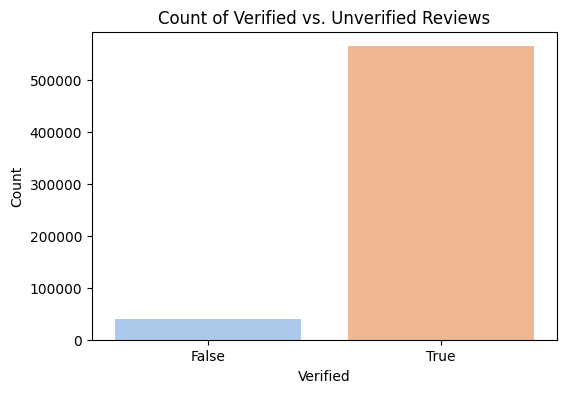

In [44]:
import seaborn as sns

# Example: Create a bar plot for 'verified' column
plt.figure(figsize=(6, 4))
sns.countplot(x='verified', data=features, palette='pastel')
plt.title('Count of Verified vs. Unverified Reviews')
plt.xlabel('Verified')
plt.ylabel('Count')
plt.show()


In [68]:
# 1. Handling Missing Values
# Assuming you want to fill NaN values in 'vote' with 0
df['vote'] = df['vote'].fillna(0)

# Drop the 'image' column if it's not useful
df = df.drop(columns=['image'])

# 2. Data Type Conversion
# Convert the 'reviewTime' column to datetime
df['reviewTime'] = pd.to_datetime(df['reviewTime'], format='%m %d, %Y')

# 3. Text Data Processing (Optional)
# Example text preprocessing for 'reviewText' column
df['reviewText'] = df['reviewText'].str.lower()  # Convert text to lowercase
df['reviewText'] = df['reviewText'].str.replace('[^\w\s]', '')  # Remove punctuation

# Example text preprocessing for 'summary' column
df['summary'] = df['summary'].str.lower()
df['summary'] = df['summary'].str.replace('[^\w\s]', '')

# Updated DataFrame with cleaned and preprocessed data
df.head()

<ipython-input-68-72595b1e3a2a>:15: FutureWarning: The default value of regex will change from True to False in a future version.
  df['reviewText'] = df['reviewText'].str.replace('[^\w\s]', '')  # Remove punctuation
<ipython-input-68-72595b1e3a2a>:19: FutureWarning: The default value of regex will change from True to False in a future version.
  df['summary'] = df['summary'].str.replace('[^\w\s]', '')


,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime
0,5,2,False,2013-11-27,A3NHUQ33CFH3VM,1118461304,{'Format:': ' Hardcover'},Greeny,not one thing in this book seemed an obvious o...,clear on what leads to innovation,1385510400
1,5,0,False,2013-11-01,A3SK6VNBQDNBJE,1118461304,{'Format:': ' Kindle Edition'},Leif C. Ulstrup,i have enjoyed dr alan gregermans weekly blog ...,becoming more innovative by opening yourself t...,1383264000
2,5,0,False,2013-10-10,A3SOFHUR27FO3K,1118461304,{'Format:': ' Hardcover'},Harry Gilbert Miller III,alan gregerman believes that innovation comes ...,the world from different perspectives,1381363200
3,5,0,False,2013-10-09,A1HOG1PYCAE157,1118461304,{'Format:': ' Hardcover'},Rebecca Ripley,alan gregerman is a smart funny entertaining w...,strangers are your new best friends,1381276800
4,5,10,False,2013-09-07,A26JGAM6GZMM4V,1118461304,{'Format:': ' Hardcover'},Robert Morris,as i began to read this book i was again remin...,how and why it is imperative to engage learn f...,1378512000


In [69]:
# Convert dictionary values to strings
df['style'] = df['style'].apply(lambda x: str(x))

# List unique values
unique_styles = df['style'].unique()
print(unique_styles)

["{'Format:': ' Hardcover'}" "{'Format:': ' Kindle Edition'}"
 "{'Size:': ' Pack of 1'}" ... "{'Color:': ' Brushed Nickel 7'}"
 "{'Color:': ' Brushed Nickel 2'}" "{'Size:': ' 1D'}"]


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602777 entries, 0 to 602776
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   overall                       602777 non-null  int64         
 1   vote                          602777 non-null  object        
 2   verified                      602777 non-null  bool          
 3   reviewTime                    602777 non-null  datetime64[ns]
 4   reviewerID                    602777 non-null  object        
 5   asin                          602777 non-null  object        
 6   style                         602777 non-null  object        
 7   reviewerName                  602762 non-null  object        
 8   reviewText                    602453 non-null  object        
 9   summary                       602649 non-null  object        
 10  unixReviewTime                602777 non-null  int64         
 11  Style_Format:

In [80]:
df.head()

,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,...,Style_Size Name:,Style_Style Name:,Style_Package Type:,Style_Package Quantity:,Style_Item Package Quantity:,Style_Pattern:,Style_Scent:,Style_Design:,Style_Length:,Style_Flavor:
0,5,2,False,2013-11-27,A3NHUQ33CFH3VM,1118461304,{'Format:': ' Hardcover'},Greeny,not one thing in this book seemed an obvious o...,clear on what leads to innovation,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5,0,False,2013-11-01,A3SK6VNBQDNBJE,1118461304,{'Format:': ' Kindle Edition'},Leif C. Ulstrup,i have enjoyed dr alan gregermans weekly blog ...,becoming more innovative by opening yourself t...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5,0,False,2013-10-10,A3SOFHUR27FO3K,1118461304,{'Format:': ' Hardcover'},Harry Gilbert Miller III,alan gregerman believes that innovation comes ...,the world from different perspectives,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,0,False,2013-10-09,A1HOG1PYCAE157,1118461304,{'Format:': ' Hardcover'},Rebecca Ripley,alan gregerman is a smart funny entertaining w...,strangers are your new best friends,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,10,False,2013-09-07,A26JGAM6GZMM4V,1118461304,{'Format:': ' Hardcover'},Robert Morris,as i began to read this book i was again remin...,how and why it is imperative to engage learn f...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
